# Display plots

In [1]:
# Allow for displaying plots in Jupyter/IPython, also as .svg
%matplotlib inline
from IPython.display import SVG, display

# Data handling, structures and analysis tools, SQLite database interface
import numpy as np
import pandas as pd
import sqlite3

# 2D plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
#import matplotlib.gridspec as gridspec

# 2D visualization library overlaying matplotlib
import seaborn as sns

# Date- and time-parsing and manipulation
import time
import datetime
import dateutil.parser
import calendar

# Default options
mpl.rcParams.update({'axes.titlesize': 14})
mpl.rcParams.update({'axes.titleweight': 'bold'})
mpl.rcParams.update({'axes.labelweight': 'bold'})
sns.set(style="whitegrid", color_codes=True)
sns_line = {"color" : "r", "alpha" : 0.5}
x_variable = 'modification_date'

In [2]:
# Read database, attach as Pandas dataframe sorted by date
db = sqlite3.connect("Data/Applications.db")
df = pd.read_sql_query('SELECT * FROM applications ORDER BY Date(' + x_variable + ') DESC', db)
db.close()

df.head()

,Title,Date,creation_date,modification_date,Interview,Offer,Reply,Words,Sentences,Lines,Readability,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog
0,HiOA,1.478650e+09,1.479064e+09,1.477753e+09,0,0,0,227.0,10.0,7.0,18th and 19th grade,23.05,14.0,15.7,18.74,18.9,11.51,97.0,16.500000,28.172511
1,"Universitetet i Oslo, Studiekonsulent",1.478650e+09,1.479064e+09,1.475589e+09,0,0,0,237.0,11.0,7.0,18th and 19th grade,24.27,14.0,15.2,19.14,18.9,11.57,103.0,17.250000,27.983966
2,Hemnes Kommune,1.478650e+09,1.479064e+09,1.475416e+09,0,0,0,226.0,12.0,7.0,13th and 14th grade,43.93,12.6,11.8,16.30,15.3,10.23,81.0,13.800000,23.856283
3,"Universitetet i Agder, Rådgiver",1.478650e+09,1.479064e+09,1.474989e+09,0,0,0,217.0,10.0,7.0,13th and 14th grade,24.07,13.8,15.3,18.27,18.3,11.55,94.0,16.750000,28.007189
4,Buskerud Fylkeskommune,1.478650e+09,1.479064e+09,1.473953e+09,0,0,0,250.0,16.0,7.0,11th and 12th grade,38.72,11.3,11.7,16.41,14.0,10.98,104.0,8.714286,24.880000


## Descriptive statistics

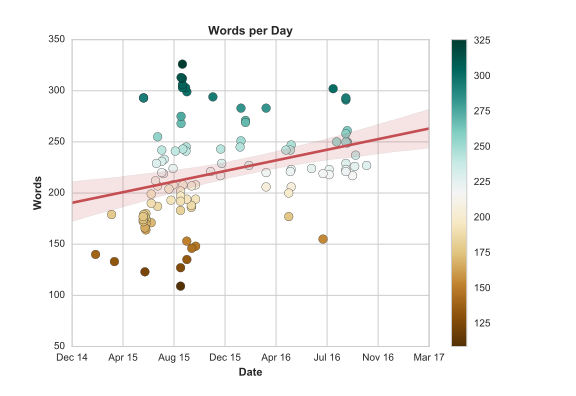

In [3]:
y_variable = 'Words'

fig = plt.figure()
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
plot = sns.regplot(x = df['modification_date'], 
                   y = df[y_variable], data=df, scatter=False, color='r')
ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%b %y') for x in xticks]
ax.set_xticklabels(xticks_dates)
sns.plt.title(y_variable + ' per Day')
ax.set(xlabel='Date')
plt.savefig('Plots/' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/' + y_variable + '.svg'))

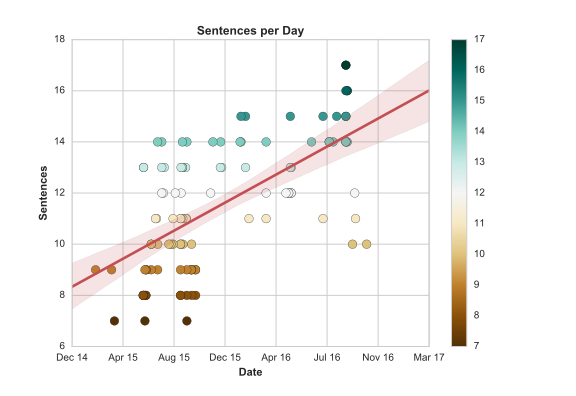

In [4]:
y_variable = 'Sentences'

fig = plt.figure()
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
plot = sns.regplot(x = df['modification_date'], 
                   y = df[y_variable], data=df, scatter=False, color='r')
ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%b %y') for x in xticks]
ax.set_xticklabels(xticks_dates)
sns.plt.title(y_variable + ' per Day')
ax.set(xlabel='Date')
plt.savefig('Plots/' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/' + y_variable + '.svg'))

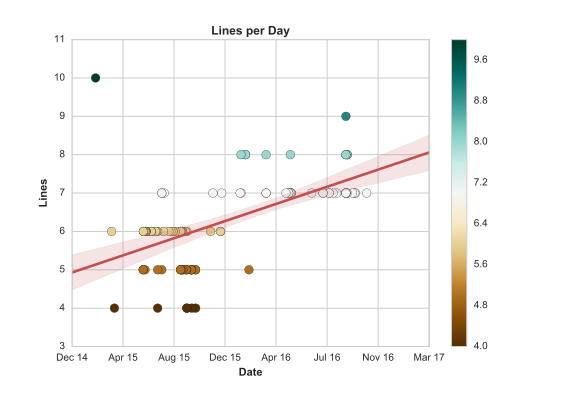

In [5]:
y_variable = 'Lines'

fig = plt.figure()
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
plot = sns.regplot(x = df['modification_date'], 
                   y = df[y_variable], data=df, scatter=False, color='r')
ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%b %y') for x in xticks]
ax.set_xticklabels(xticks_dates)
sns.plt.title(y_variable + ' per Day')
ax.set(xlabel='Date')
plt.savefig('Plots/' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/' + y_variable + '.svg'))

### Grouped plot

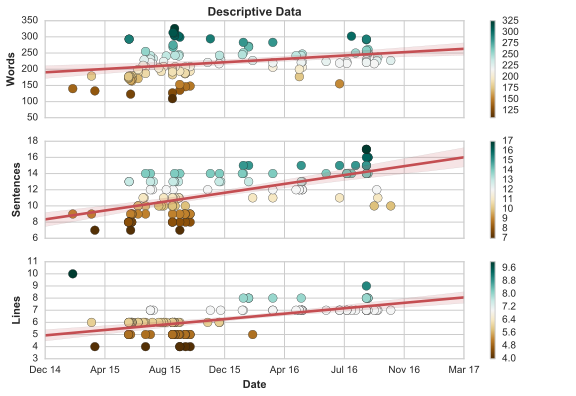

In [6]:
fig = plt.figure()

ax1 = plt.subplot(311)
y_variable = 'Words'
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
sns.regplot(x = df['modification_date'], 
            y = df[y_variable], data=df, scatter=False, color='r')
plt.title('Descriptive Data')
plt.xlabel('')
ax1.set_xticklabels([])

ax2 = plt.subplot(312)
y_variable = 'Sentences'
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
sns.regplot(x = df['modification_date'], 
            y = df[y_variable], data=df, scatter=False, color='r')
plt.xlabel('')
ax2.set_xticklabels([])

ax3 = plt.subplot(313)
y_variable = 'Lines'
points = plt.scatter(x = df['modification_date'], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
sns.regplot(x = df['modification_date'], 
            y = df[y_variable], data=df, scatter=False, color='r')
xticks = ax2.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%b %y') for x in xticks]
plt.xlabel('Date')
ax3.set_xticklabels(xticks_dates)

plt.tight_layout(pad=0.6, w_pad=0.8, h_pad=1.2)
plt.savefig('Plots/Descriptives.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/Descriptives.svg'))

## Text Statistics

In [7]:
# Calculate a Readability consensus
consensus = []
for grade in df['Readability']:
    grade = grade.replace('th', '').replace(' grade', '').replace(' and ', '-')
    numbers = grade.split('-')
    numbers = [int(i) for i in numbers]
    numbers_mean = np.mean(numbers)
    consensus.append(numbers_mean)
df["consensus_mean"] = consensus

df.head()

,Title,Date,creation_date,modification_date,Interview,Offer,Reply,Words,Sentences,Lines,...,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,consensus_mean
0,HiOA,1.478650e+09,1.479064e+09,1.477753e+09,0,0,0,227.0,10.0,7.0,...,23.05,14.0,15.7,18.74,18.9,11.51,97.0,16.500000,28.172511,18.5
1,"Universitetet i Oslo, Studiekonsulent",1.478650e+09,1.479064e+09,1.475589e+09,0,0,0,237.0,11.0,7.0,...,24.27,14.0,15.2,19.14,18.9,11.57,103.0,17.250000,27.983966,18.5
2,Hemnes Kommune,1.478650e+09,1.479064e+09,1.475416e+09,0,0,0,226.0,12.0,7.0,...,43.93,12.6,11.8,16.30,15.3,10.23,81.0,13.800000,23.856283,13.5
3,"Universitetet i Agder, Rådgiver",1.478650e+09,1.479064e+09,1.474989e+09,0,0,0,217.0,10.0,7.0,...,24.07,13.8,15.3,18.27,18.3,11.55,94.0,16.750000,28.007189,13.5
4,Buskerud Fylkeskommune,1.478650e+09,1.479064e+09,1.473953e+09,0,0,0,250.0,16.0,7.0,...,38.72,11.3,11.7,16.41,14.0,10.98,104.0,8.714286,24.880000,11.5


### Grouped plot

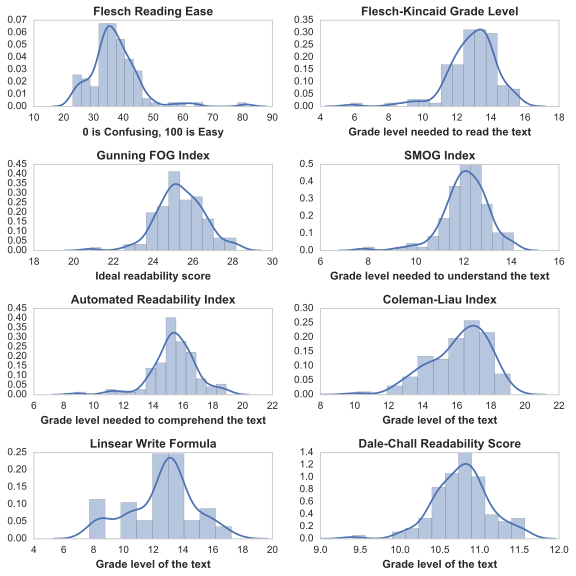

In [8]:
sns.set_style("whitegrid", {'grid.linestyle': ''})
fig = plt.figure(figsize=(8,8))

nrows = 4
ncols = 2

ax1 = plt.subplot(nrows, ncols, 1)
sns.distplot(df['flesch_reading_ease'])
plt.title('Flesch Reading Ease')
plt.xlabel('0 is Confusing, 100 is Easy')

ax2 = plt.subplot(nrows, ncols, 2)
sns.distplot(df['flesch_kincaid_grade'])
plt.title('Flesch-Kincaid Grade Level')
plt.xlabel('Grade level needed to read the text')

ax3 = plt.subplot(nrows, ncols, 3)
sns.distplot(df['gunning_fog'])
plt.title('Gunning FOG Index')
plt.xlabel('Ideal readability score')

ax4 = plt.subplot(nrows, ncols, 4)
sns.distplot(df['smog_index'])
plt.title('SMOG Index')
plt.xlabel('Grade level needed to understand the text')

ax5 = plt.subplot(nrows, ncols, 5)
sns.distplot(df['automated_readability_index'])
plt.title('Automated Readability Index')
plt.xlabel('Grade level needed to comprehend the text')

ax6 = plt.subplot(nrows, ncols, 6)
sns.distplot(df['coleman_liau_index'])
plt.title('Coleman-Liau Index')
plt.xlabel('Grade level of the text')

ax7 = plt.subplot(nrows, ncols, 7)
sns.distplot(df['linsear_write_formula'])
plt.title('Linsear Write Formula')
plt.xlabel('Grade level of the text')

ax8 = plt.subplot(nrows, ncols, 8)
sns.distplot(df['dale_chall_readability_score'])
plt.title('Dale-Chall Readability Score')
plt.xlabel('Grade level of the text')


plt.tight_layout(pad=0.6, w_pad=0.8, h_pad=1.2)
plt.savefig('Plots/Textstats.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/Textstats.svg'))

### Readability Consensus plot

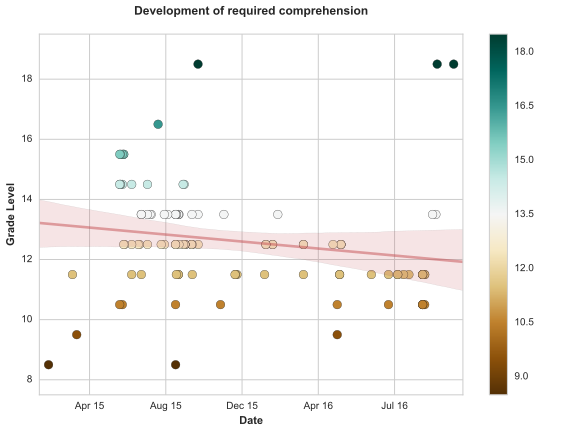

In [9]:
sns.set_style("whitegrid", {'grid.linestyle': '-'})
y_variable = 'consensus_mean'

fig = plt.figure(figsize=(8, 6))
points = plt.scatter(x = df[x_variable], 
                     y = df[y_variable], c=df[y_variable], s=75, cmap="BrBG")
plt.colorbar(points)
plot = sns.regplot(x = df[x_variable], 
                   y = df[y_variable], data=df, scatter=False, line_kws = sns_line)
ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%b %y') for x in xticks]
ax.set_xticklabels(xticks_dates)
sns.plt.title('Development of required comprehension', y = 1.04)
ax.set(ylabel='Grade Level', xlabel='Date')
plt.ylim([(df[y_variable].min()-1), (df[y_variable].max()+1)])
plt.xlim([(df[x_variable].min()-60*60*24*7*2), (df[x_variable].max()+60*60*24*7*2)])

plt.tight_layout(pad=0.6, w_pad=0.8, h_pad=1.2)
plt.savefig('Plots/ReadabilityConsensus.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/ReadabilityConsensus.svg'))

## Reading Time Statistics

In [10]:
words = df['Words'].tolist()

# Pass Words to Numpy array, split in three parts, then find bounds
words = np.array(words)
words_sorted = np.sort(words)
words_sorted_split = np.array_split(words_sorted, 3)
words_short_max = np.amax(words_sorted_split[0])
words_long_min = np.amin(words_sorted_split[2])

# Using bounds, create `WordClass` column with categorical designations of length
df.loc[df['Words'] <= words_short_max,'WordClass'] = 'Short'
df.loc[(df['Words'] > words_short_max) & (df['Words'] < words_long_min), 'WordClass'] = 'Medium'
df.loc[df['Words'] >= words_long_min,'WordClass'] = 'Long'
df['WordClass'] = df['WordClass'].astype('category')

df.head()

,Title,Date,creation_date,modification_date,Interview,Offer,Reply,Words,Sentences,Lines,...,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,consensus_mean,WordClass
0,HiOA,1.478650e+09,1.479064e+09,1.477753e+09,0,0,0,227.0,10.0,7.0,...,14.0,15.7,18.74,18.9,11.51,97.0,16.500000,28.172511,18.5,Medium
1,"Universitetet i Oslo, Studiekonsulent",1.478650e+09,1.479064e+09,1.475589e+09,0,0,0,237.0,11.0,7.0,...,14.0,15.2,19.14,18.9,11.57,103.0,17.250000,27.983966,18.5,Medium
2,Hemnes Kommune,1.478650e+09,1.479064e+09,1.475416e+09,0,0,0,226.0,12.0,7.0,...,12.6,11.8,16.30,15.3,10.23,81.0,13.800000,23.856283,13.5,Medium
3,"Universitetet i Agder, Rådgiver",1.478650e+09,1.479064e+09,1.474989e+09,0,0,0,217.0,10.0,7.0,...,13.8,15.3,18.27,18.3,11.55,94.0,16.750000,28.007189,13.5,Medium
4,Buskerud Fylkeskommune,1.478650e+09,1.479064e+09,1.473953e+09,0,0,0,250.0,16.0,7.0,...,11.3,11.7,16.41,14.0,10.98,104.0,8.714286,24.880000,11.5,Long


### Distribution of Words plot

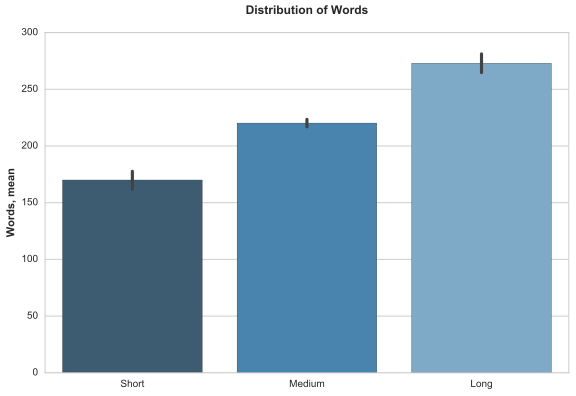

In [11]:
fig = plt.figure()
sns.barplot(data = df, x = "WordClass", y = "Words", order = ['Short', 'Medium', 'Long'], 
            palette = "Blues_d")
ax = plt.gca()
sns.plt.title('Distribution of Words', y = 1.04)
ax.set(ylabel = 'Words, mean', xlabel = '')

plt.tight_layout(pad=0.6, w_pad=0.8, h_pad=1.2)
plt.savefig('Plots/WordDistribution.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/WordDistribution.svg'))

### Reading Times

In [12]:
# Words Per Minute levels per grade
gradeLevelTimes = (150, 250, 300, 350, 450, 575, 675, 800)

# Calculate seconds to read at each grade and insert into Dataframe
for number in gradeLevelTimes:
    df[str(number) + '_WordsSecs'] = (df['Words'] / number) * 60

df.head()

,Title,Date,creation_date,modification_date,Interview,Offer,Reply,Words,Sentences,Lines,...,consensus_mean,WordClass,150_WordsSecs,250_WordsSecs,300_WordsSecs,350_WordsSecs,450_WordsSecs,575_WordsSecs,675_WordsSecs,800_WordsSecs
0,HiOA,1.478650e+09,1.479064e+09,1.477753e+09,0,0,0,227.0,10.0,7.0,...,18.5,Medium,90.8,54.48,45.4,38.914286,30.266667,23.686957,20.177778,17.025
1,"Universitetet i Oslo, Studiekonsulent",1.478650e+09,1.479064e+09,1.475589e+09,0,0,0,237.0,11.0,7.0,...,18.5,Medium,94.8,56.88,47.4,40.628571,31.600000,24.730435,21.066667,17.775
2,Hemnes Kommune,1.478650e+09,1.479064e+09,1.475416e+09,0,0,0,226.0,12.0,7.0,...,13.5,Medium,90.4,54.24,45.2,38.742857,30.133333,23.582609,20.088889,16.950
3,"Universitetet i Agder, Rådgiver",1.478650e+09,1.479064e+09,1.474989e+09,0,0,0,217.0,10.0,7.0,...,13.5,Medium,86.8,52.08,43.4,37.200000,28.933333,22.643478,19.288889,16.275
4,Buskerud Fylkeskommune,1.478650e+09,1.479064e+09,1.473953e+09,0,0,0,250.0,16.0,7.0,...,11.5,Long,100.0,60.00,50.0,42.857143,33.333333,26.086957,22.222222,18.750


In [13]:
# Calculate mean reading times for each category, insert into new DataFrame
dfGradeTimes = pd.DataFrame(columns=('Short', 'Medium', 'Long'))
for number in gradeLevelTimes:
    dfGradeTimes.loc[number] = [df[str(number) + '_WordsSecs'].where(df['WordClass'] == 'Short').mean(), 
                                df[str(number) + '_WordsSecs'].where(df['WordClass'] == 'Medium').mean(), 
                                df[str(number) + '_WordsSecs'].where(df['WordClass'] == 'Long').mean()]
dfGradeTimes

,Short,Medium,Long
150,67.988889,88.088889,109.142857
250,40.793333,52.853333,65.485714
300,33.994444,44.044444,54.571429
350,29.138095,37.752381,46.775510
450,22.662963,29.362963,36.380952
575,17.736232,22.979710,28.472050
675,15.108642,19.575309,24.253968
800,12.747917,16.516667,20.464286


### Time to Read plots

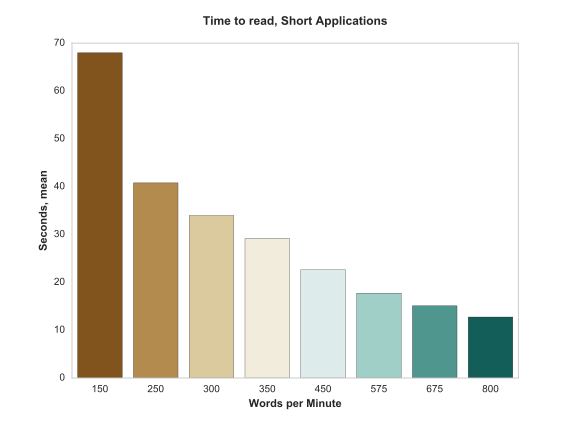

In [14]:
sns.set_style("whitegrid", {'grid.linestyle': ''})
y_variable = 'Short'

fig = plt.figure(figsize=(8, 6))
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
ax = plt.gca()
sns.plt.title('Time to read, ' + y_variable + ' Applications', y = 1.04)
ax.set(ylabel = 'Seconds, mean', xlabel = 'Words per Minute')

plt.savefig('Plots/WPM_' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/WPM_' + y_variable + '.svg'))

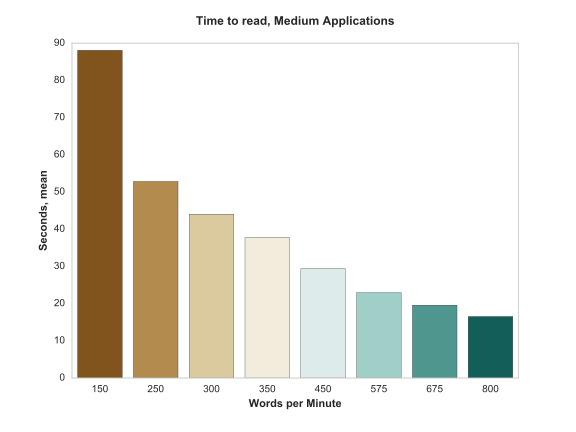

In [15]:
sns.set_style("whitegrid", {'grid.linestyle': ''})
y_variable = 'Medium'

fig = plt.figure(figsize=(8, 6))
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
ax = plt.gca()
sns.plt.title('Time to read, ' + y_variable + ' Applications', y = 1.04)
ax.set(ylabel = 'Seconds, mean', xlabel = 'Words per Minute')

plt.savefig('Plots/WPM_' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/WPM_' + y_variable + '.svg'))

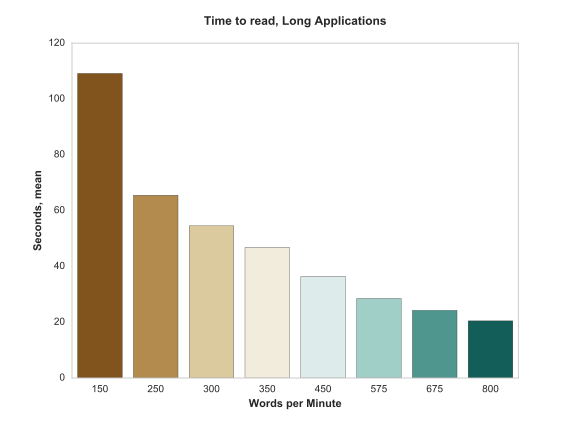

In [16]:
sns.set_style("whitegrid", {'grid.linestyle': ''})
y_variable = 'Long'

fig = plt.figure(figsize=(8, 6))
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
ax = plt.gca()
sns.plt.title('Time to read, ' + y_variable + ' Applications', y = 1.04)
ax.set(ylabel = 'Seconds, mean', xlabel = 'Words per Minute')

plt.savefig('Plots/WPM_' + y_variable + '.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/WPM_' + y_variable + '.svg'))

### Grouped plots

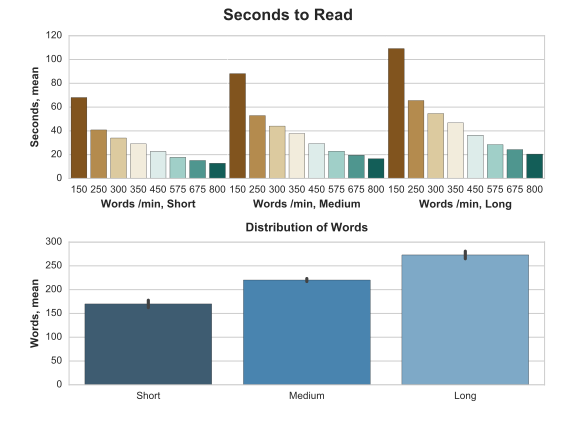

In [17]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8, 6))

nrows = 2
ncols = 3

ax0 = plt.subplot(nrows, 1, 2)
sns.barplot(data = df, x = "WordClass", y = "Words", order = ['Short', 'Medium', 'Long'], 
            palette = "Blues_d")
ax0 = plt.gca()
sns.plt.title('Distribution of Words', y = 1.04)
ax0.set(ylabel = 'Words, mean', xlabel = '')

y_variable = 'Short'
ax1 = plt.subplot(nrows, ncols, 1)
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
plt.ylabel('Seconds, mean')
plt.xlabel('Words /min, ' + y_variable)
ax1.spines["right"].set_visible(False)

y_variable = 'Medium'
ax2 = plt.subplot(nrows, ncols, 2, sharey=ax1)
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
plt.ylabel('')
plt.xlabel('Words /min, ' + y_variable)
ax2.tick_params(axis='y', which='both', labelleft='off')
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

y_variable = 'Long'
ax3 = plt.subplot(nrows, ncols, 3, sharey=ax2)
sns.barplot(data = dfGradeTimes, x = list(dfGradeTimes.index.values), y = y_variable,
            palette = "BrBG")
plt.ylabel('')
plt.xlabel('Words /min, ' + y_variable)
ax3.tick_params(axis='y', which='both', labelleft='off')
ax3.spines["left"].set_visible(False)

fig.suptitle('Seconds to Read', fontsize = 16, fontweight = 'bold')
plt.tight_layout(pad=2.6, w_pad=0, h_pad=1.2)
plt.savefig('Plots/ReadingTime.svg', format='svg', dpi=300)
plt.close(fig)

display(SVG('Plots/ReadingTime.svg'))